In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.head()

In [ ]:
data.drop(["Name","Fare"],axis = 1,inplace=True)

In [ ]:
data.drop(["PassengerId"],axis = 1,inplace=True)

In [ ]:
data.drop("Ticket",axis = 1, inplace=True)

In [ ]:
data.drop("Cabin",axis = 1,inplace=True)

In [ ]:
data["FamilySize"] = data["Parch"]+data["SibSp"]

In [ ]:
data.drop(["Parch","SibSp"],inplace=True,axis = 1)

In [ ]:
sns.boxplot(x = "Pclass",y = "Age",data=data )

In [340]:
median = data["Age"].median()
std = data['Age'].std()
outliers = (data['Age'] - median).abs() > std

In [341]:
data["Age"][outliers] = np.nan

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [342]:
data.isna().sum()

Survived        0
Pclass          0
Sex             0
Age           377
Embarked        2
FamilySize      0
dtype: int64

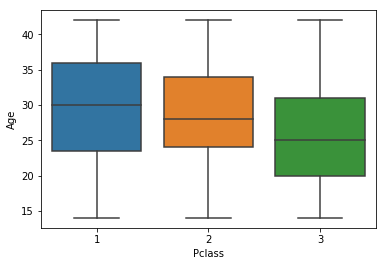

In [343]:
sns.boxplot(x = "Pclass",y = "Age",data=data )

In [ ]:
median1 = data.query('Pclass == 1')["Age"].median()
median2 = data.query('Pclass == 2')["Age"].median()
median3 = data.query('Pclass == 3')["Age"].median()
std1 = data.query('Pclass == 1')['Age'].std()
std2 = data.query('Pclass == 2')['Age'].std()
std3 = data.query('Pclass == 3')['Age'].std()
outliers1 = (data.query('Pclass == 1')['Age'] - median).abs() > std
outliers2 = (data.query('Pclass == 2')['Age'] - median).abs() > std
outliers3 = (data.query('Pclass == 3')['Age'] - median).abs() > std

In [ ]:
outliers = pd.concat([outliers1,outliers2,outliers3],axis = 0)

In [ ]:
data["Age"][outliers] = np.nan

In [ ]:
data.isna().sum()

In [ ]:
sns.boxplot(x = "Pclass",y = "Age",data=data )

In [427]:
median3

24.0

In [ ]:
for i,value in data.Age.iteritems():
    if value == np.nan:
        if data["Pclass"][i] == 1:
            data["Age"][i] = median1
        elif data["Pclass"][i] == 2:
            data["Age"][i] = median2
        else:
            data["Age"][i] = median3
    

In [431]:
for i,value in data.Age.iteritems():
    if value == np.nan:
        print("n")

In [ ]:
data.isna().sum()